Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide. The company's name comes from "air mattress B&B.”

#Importing Packages



In [1]:
!pip install geopandas


In [2]:
'''Importing Data Manipulation Modules'''

import numpy as np
import pandas as pd

'''Seaborn and Matplotlib Visualization'''

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd                       # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''

import plotly as plotly                  # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)


'''Spatial Visualizations'''

import folium
import folium.plugins


'''NLP - WordCloud'''

import wordcloud
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator


'''Machine Learning'''


import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score , mean_absolute_error
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor




#Check versions

Print out the versions of all the packages & libraries that we are going to work with:




In [3]:
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Geopandas version:', gpd.__version__)
print('Plotly version:', plotly.__version__)
print('Scikit-learn version:', sklearn.__version__)
print('Wordcloud version:', wordcloud.__version__)
print('Folium version:', folium.__version__)


Numpy version: 1.25.2
Pandas version: 2.0.3
Seaborn version: 0.13.1
Matplotlib version: 3.7.1
Geopandas version: 0.13.2
Plotly version: 5.15.0
Scikit-learn version: 1.2.2
Wordcloud version: 1.9.3
Folium version: 0.14.0


#Reading data

In [4]:
airbnb=pd.read_csv('/content/AB_NYC_2019.csv')
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
airbnb.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

##Transformation & Cleaning

In [6]:
#Checking for null values in the Airbnb dataset¶
airbnb.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Method allows the user to analyze and drop Rows/Columns with Null values in different ways
# airbnb.dropna()

REPLACE_NAME_VALUE = "$"
REPLACE_HOST_NAME_VALUE = "#"

# Fill NA/NaN values using the specified method.
airbnb['name'].fillna(REPLACE_NAME_VALUE, inplace=True)
airbnb['host_name'].fillna(REPLACE_HOST_NAME_VALUE, inplace=True)

# Dropping the column last review as more than 10,000 data points contains null values.
# airbnb.drop(['last_review'], axis=1, inplace=True)
# airbnb.drop(['reviews_per_month'], axis=1, inplace=True)

In [8]:
print("Length of Airbnb DataFrame that match with Name = \"{}\": {}".format(REPLACE_NAME_VALUE, len(airbnb[airbnb.name == REPLACE_NAME_VALUE])))
print("Length of Airbnb DataFrame that match with Host_Name = \"{}\": {}".format(REPLACE_HOST_NAME_VALUE, len(airbnb[airbnb.host_name == REPLACE_HOST_NAME_VALUE])))

Length of Airbnb DataFrame that match with Name = "$": 16
Length of Airbnb DataFrame that match with Host_Name = "#": 21


In [9]:
'''Show the first 5 rows in airbnb dataset'''
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

#Understanding our Data


In [10]:
#Dataframe Length and shape¶
len(airbnb.index)


48895

In [11]:
airbnb.shape

(48895, 16)

In [12]:
timeit airbnb.shape


1.85 µs ± 505 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
#Retrieves rows based on index label¶

airbnb.loc[0]


id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [14]:
#Print a concise summary of a DataFrame
airbnb.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [15]:
#Generate descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset’s distribution, excluding NaN values
airbnb.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

#**Analysis**

In [16]:
airbnb.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

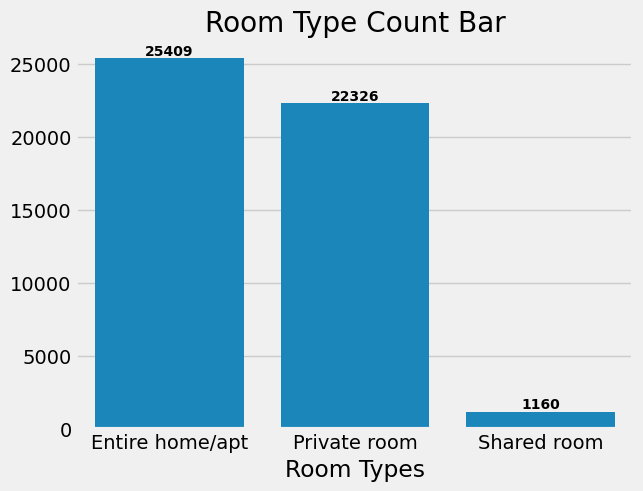

In [17]:
room_type_plot = sns.countplot(x='room_type',order= airbnb.room_type.value_counts().index, data=airbnb)
room_type_plot.set(xlabel='Room Types', ylabel='', title='Room Type Count Bar')

for bar in room_type_plot.patches:
    h = bar.get_height()
    room_type_plot.text(
        bar.get_x() + bar.get_width()/2.,  # bar index (x coordinate of text)
        h,                                 # y coordinate of text
        '%d' % int(h),                     # y label
        ha='center',
        va='bottom',
        color='black',
        fontweight='bold',
        size=10)

plt.show()

According to the above graphic we can see that the most rented room type is the "Entire home/apartment" with a total count of 25.409 following by the "Private Room" and "Shared Room" with 22.326 and 1.160 respectively. It's obviously that all the people who rent an Airbnb prefer an entire home !

In [18]:
#Percentage Representation of Neighbourhood Group in Pie
airbnb.neighbourhood_group.value_counts(dropna=False , normalize=True)

neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: proportion, dtype: float64

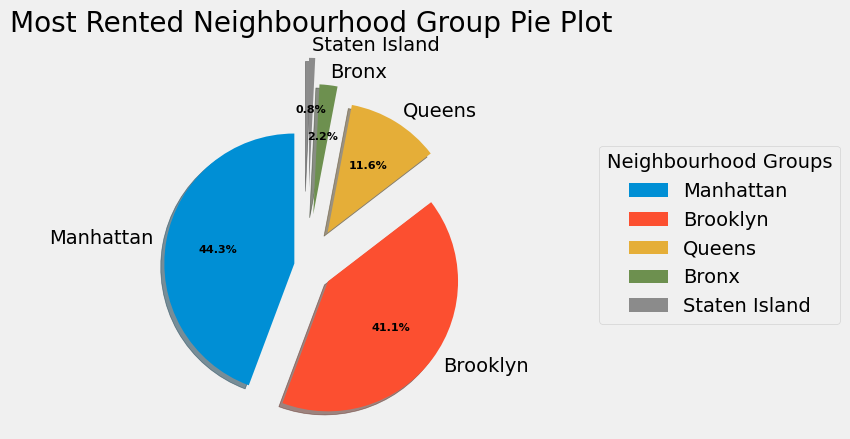

In [19]:
labels = airbnb.neighbourhood_group.value_counts().index
sizes = airbnb.neighbourhood_group.value_counts().values
explode = (0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set(title="Most Rented Neighbourhood Group Pie Plot")
ax.legend(wedges, labels,
          title="Neighbourhood Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.show()

In [20]:
##Neighbourhoods grouped by Neighbourhood Group in BarChart

for neighbourhood_group in airbnb.neighbourhood_group.unique():
    neighbourhoods = airbnb.neighbourhood[airbnb.neighbourhood_group == neighbourhood_group].unique()
    print("{} has {} Neighbourhoods: {}...\n".format(
        neighbourhood_group,
        len(neighbourhoods),
        neighbourhoods[:5]
    ))

Brooklyn has 47 Neighbourhoods: ['Kensington' 'Clinton Hill' 'Bedford-Stuyvesant' 'South Slope'
 'Williamsburg']...

Manhattan has 32 Neighbourhoods: ['Midtown' 'Harlem' 'East Harlem' 'Murray Hill' "Hell's Kitchen"]...

Queens has 51 Neighbourhoods: ['Long Island City' 'Woodside' 'Flushing' 'Sunnyside' 'Ridgewood']...

Staten Island has 43 Neighbourhoods: ['St. George' 'Tompkinsville' 'Emerson Hill' 'Shore Acres' 'Arrochar']...

Bronx has 48 Neighbourhoods: ['Highbridge' 'Clason Point' 'Eastchester' 'Kingsbridge' 'Woodlawn']...



<ipython-input-21-c0720e21d6ba>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-c0720e21d6ba>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-c0720e21d6ba>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-c0720e21d6ba>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-c0720e21d6ba>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

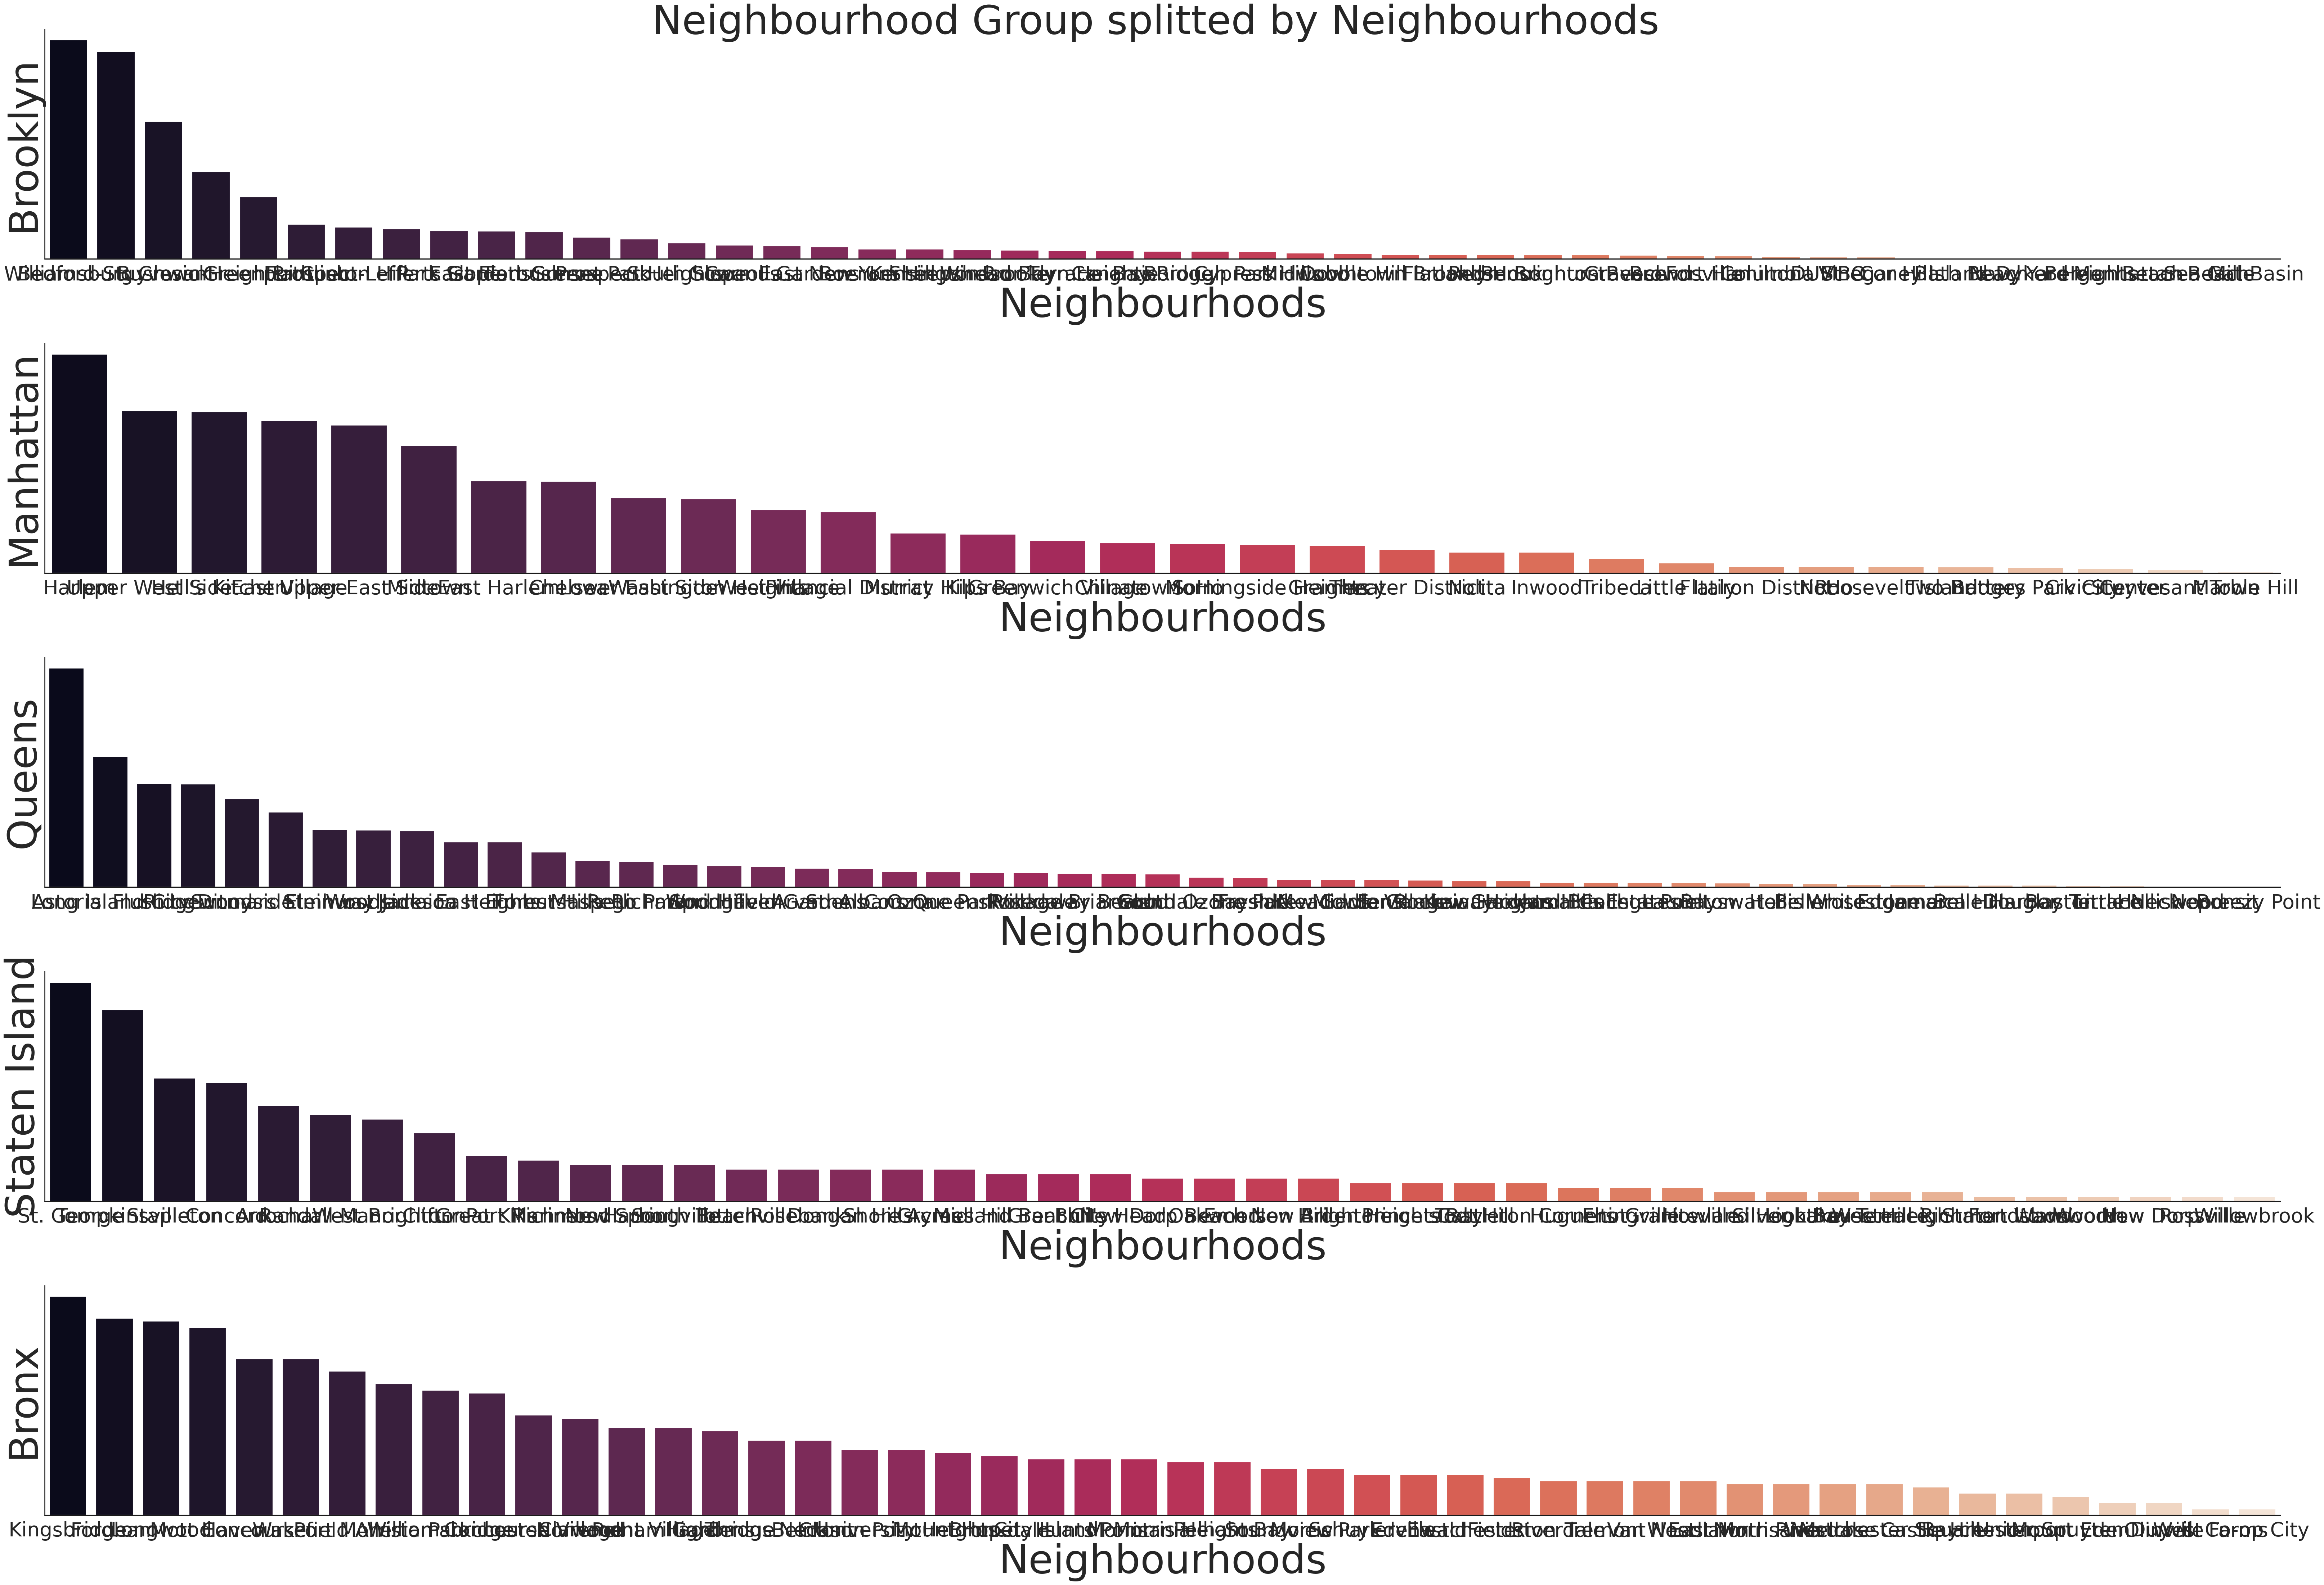

In [21]:

sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, subplots = plt.subplots(len(airbnb.neighbourhood_group.unique()), 1, figsize=(65, 45))

for i, neighbourhood_group in enumerate(airbnb.neighbourhood_group.unique()):
    neighbourhoods = airbnb.neighbourhood[airbnb.neighbourhood_group == neighbourhood_group]
    ax = subplots[i]
    x = np.array(neighbourhoods.value_counts().index)
    y = neighbourhoods.value_counts().values
    sns.barplot(x=x, y=y, palette="rocket", ax=ax)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_ylabel(neighbourhood_group,size=80)
    ax.set_xlabel('Neighbourhoods',size=80)
    ax.tick_params(labelsize=40)

# Finalize the plot
sns.despine(bottom=True)
f.suptitle('Neighbourhood Group splitted by Neighbourhoods ',size=80)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show()

Given this graphic outputs we finally can see, that the most rented neighbourhood group is Manhattan 59,1 km² (44.4%) following by Brooklyn 180 km² (41.1%) and Queens 280 km² (11.6%). As we can see given the last results that as much surface has the neighbourhood group doesn't mean will have the most rented zone, moreover it's the smallest one !

For the other hand, given the graphic above (Neighbourhood Group splitted by Neighbourhoods) we finally came up that the most rented neighbourhoods are:

Williamsburg (Brooklyn).
Harlem (Manhattan).
Astoria (Queens).
St.George (Staten Island)
Kinsbridge (Bronx)

Density and Distribution of Prices for each Neighbourhood Group¶


<ipython-input-22-9b685fd0e779>:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



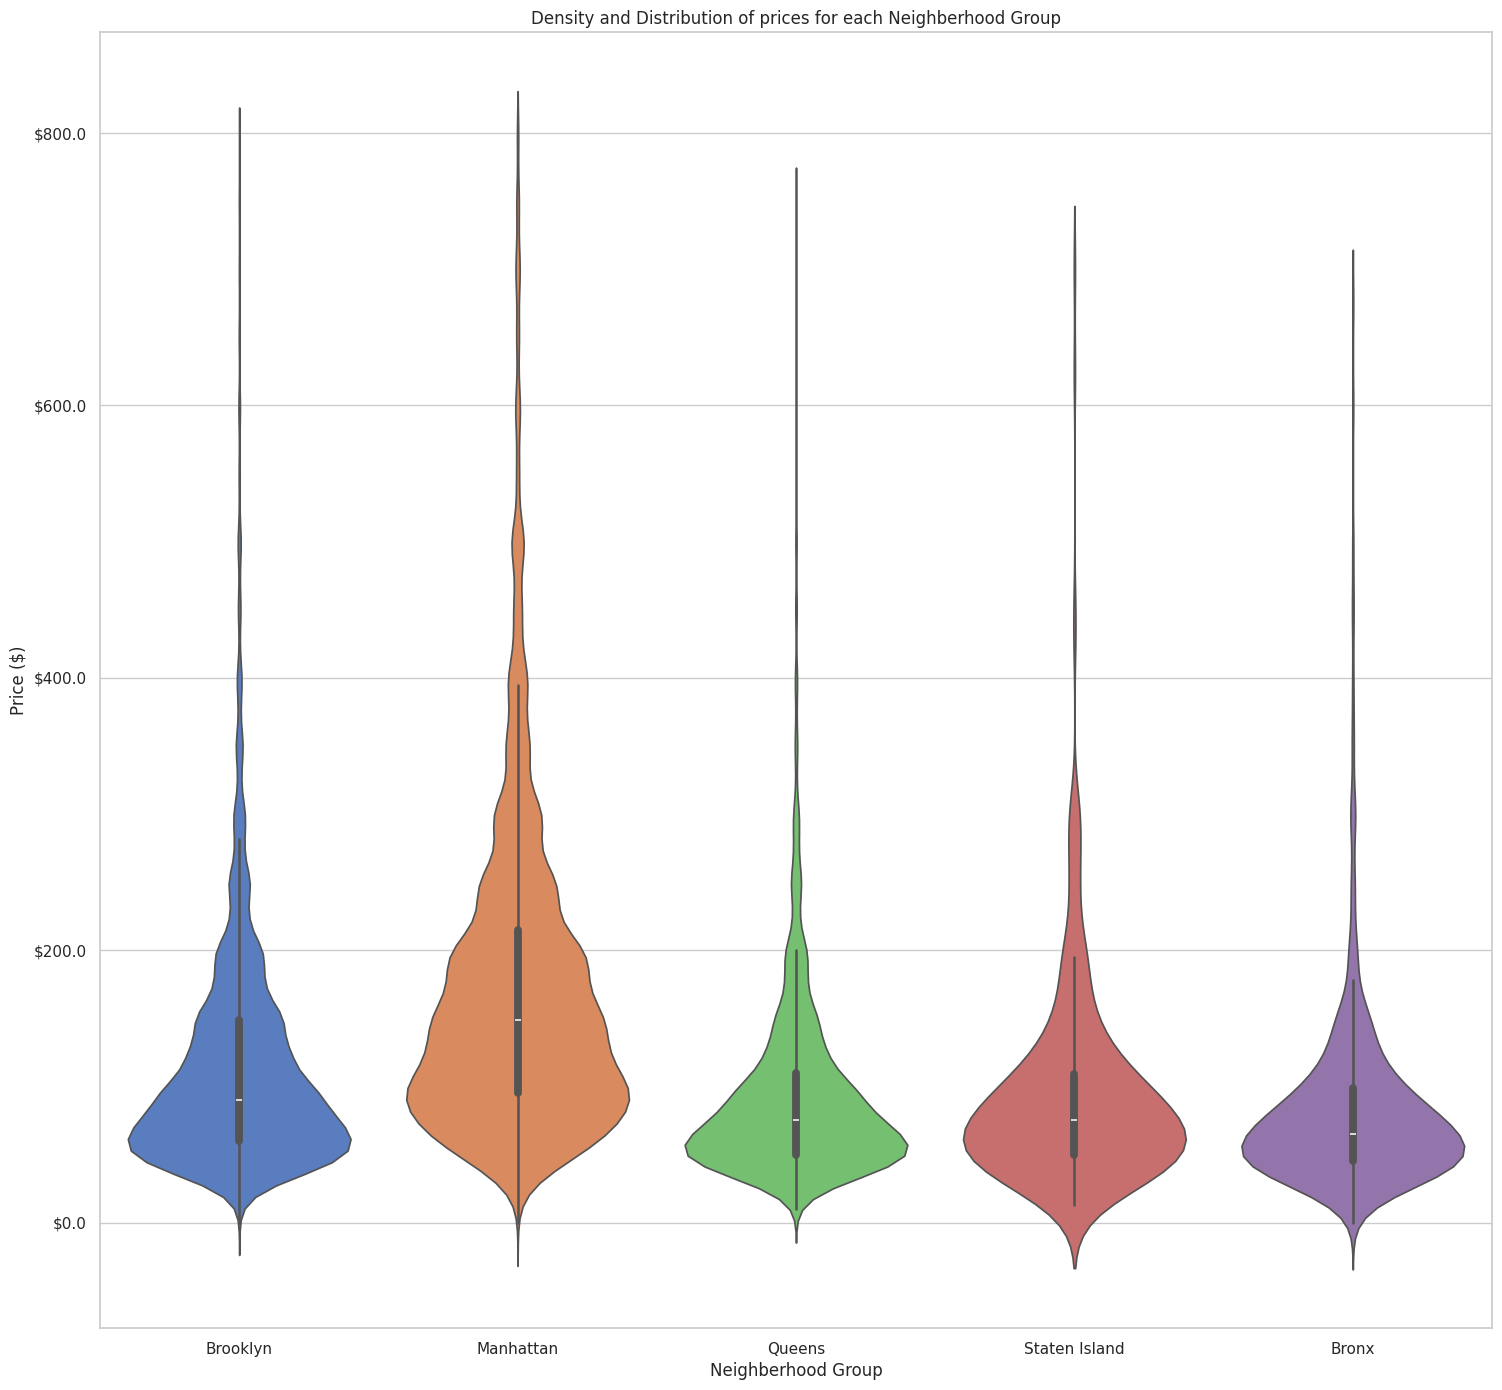

In [22]:
sns.set(style="whitegrid")
# Parameters
FILTER_PRICE_VALUE = 800

# Filter airbnb prices for shake of the visualization
sub_airbnb_price = airbnb[airbnb.price < FILTER_PRICE_VALUE]

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(16, 16))
density_neigh_price_plot = sns.violinplot(ax=ax, x="neighbourhood_group", y="price",
                                          hue="neighbourhood_group", data=sub_airbnb_price,
                                          palette="muted", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='Price ($)',
                             title='Density and Distribution of prices for each Neighberhood Group')
ylabels = ['${}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

According to the "Density and Distribution of prices for each Neighborhood Group" plot we can set up that the average of all the apartment & room prices are between 50$ - 200$, but is more remarkable for the average zones like: Queens, Staten Island and Bronx.

For the other hand, we can notice a slightly overpriced in Manhattan and Brooklyn neighborhood group, with the majority of density in prices between 200$ - 400$ it's definitely a difference if you are going to get a rent in the next days and you want to save your wallet!

We finally decide there is a notice over cost if you'd like to rent a room/apartment in the Manhattan neighbourhood group between 100$ - 600$.

**Minimum of nights by Room Type.**

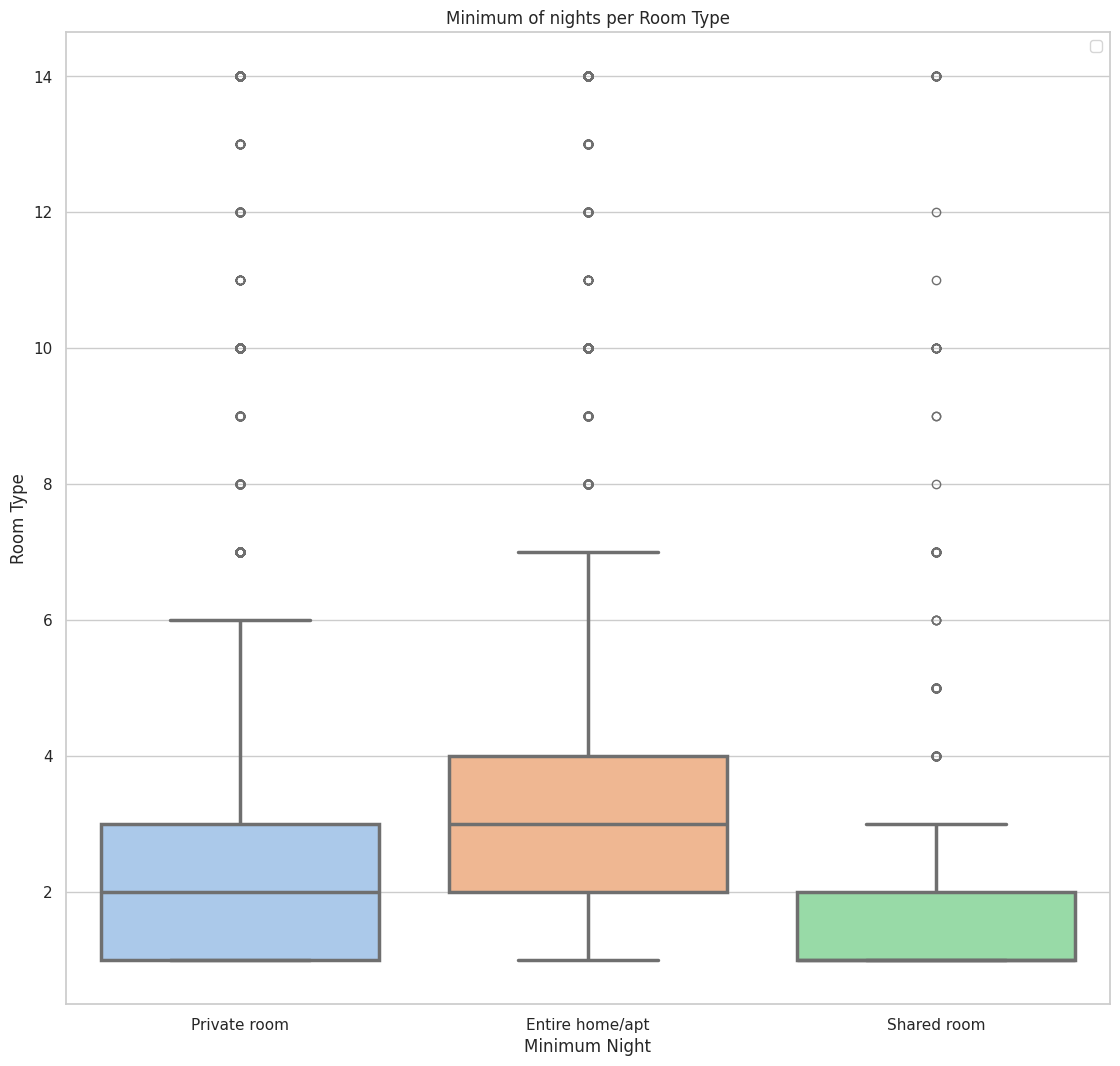

In [23]:
# Parameters
MINIMUM_NIGHTS_FILTER = 15      # Filter minimum nights to 2 weeks (15 days/nights)

# Data Preparation
sub_airbnb = airbnb[airbnb.minimum_nights < MINIMUM_NIGHTS_FILTER]

# BoxPlot Creation
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(style="ticks", palette="pastel")
nights_per_room = sns.boxplot(x="room_type", y="minimum_nights", ax=ax,
                              hue="room_type", dodge=False, linewidth=2.5,
                              data=sub_airbnb,)

nights_per_room.set(xlabel='Minimum Night', ylabel='Room Type',
                             title='Minimum of nights per Room Type')
plt.legend(loc='upper right')
plt.show()

Following the above Boxplot we could translate this representation of data into medians to see the average of minimum nights per room type.


**Distribution Price by Neighbourhood Groups**

<ipython-input-24-ba61a81ad5ae>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-ba61a81ad5ae>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-ba61a81ad5ae>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

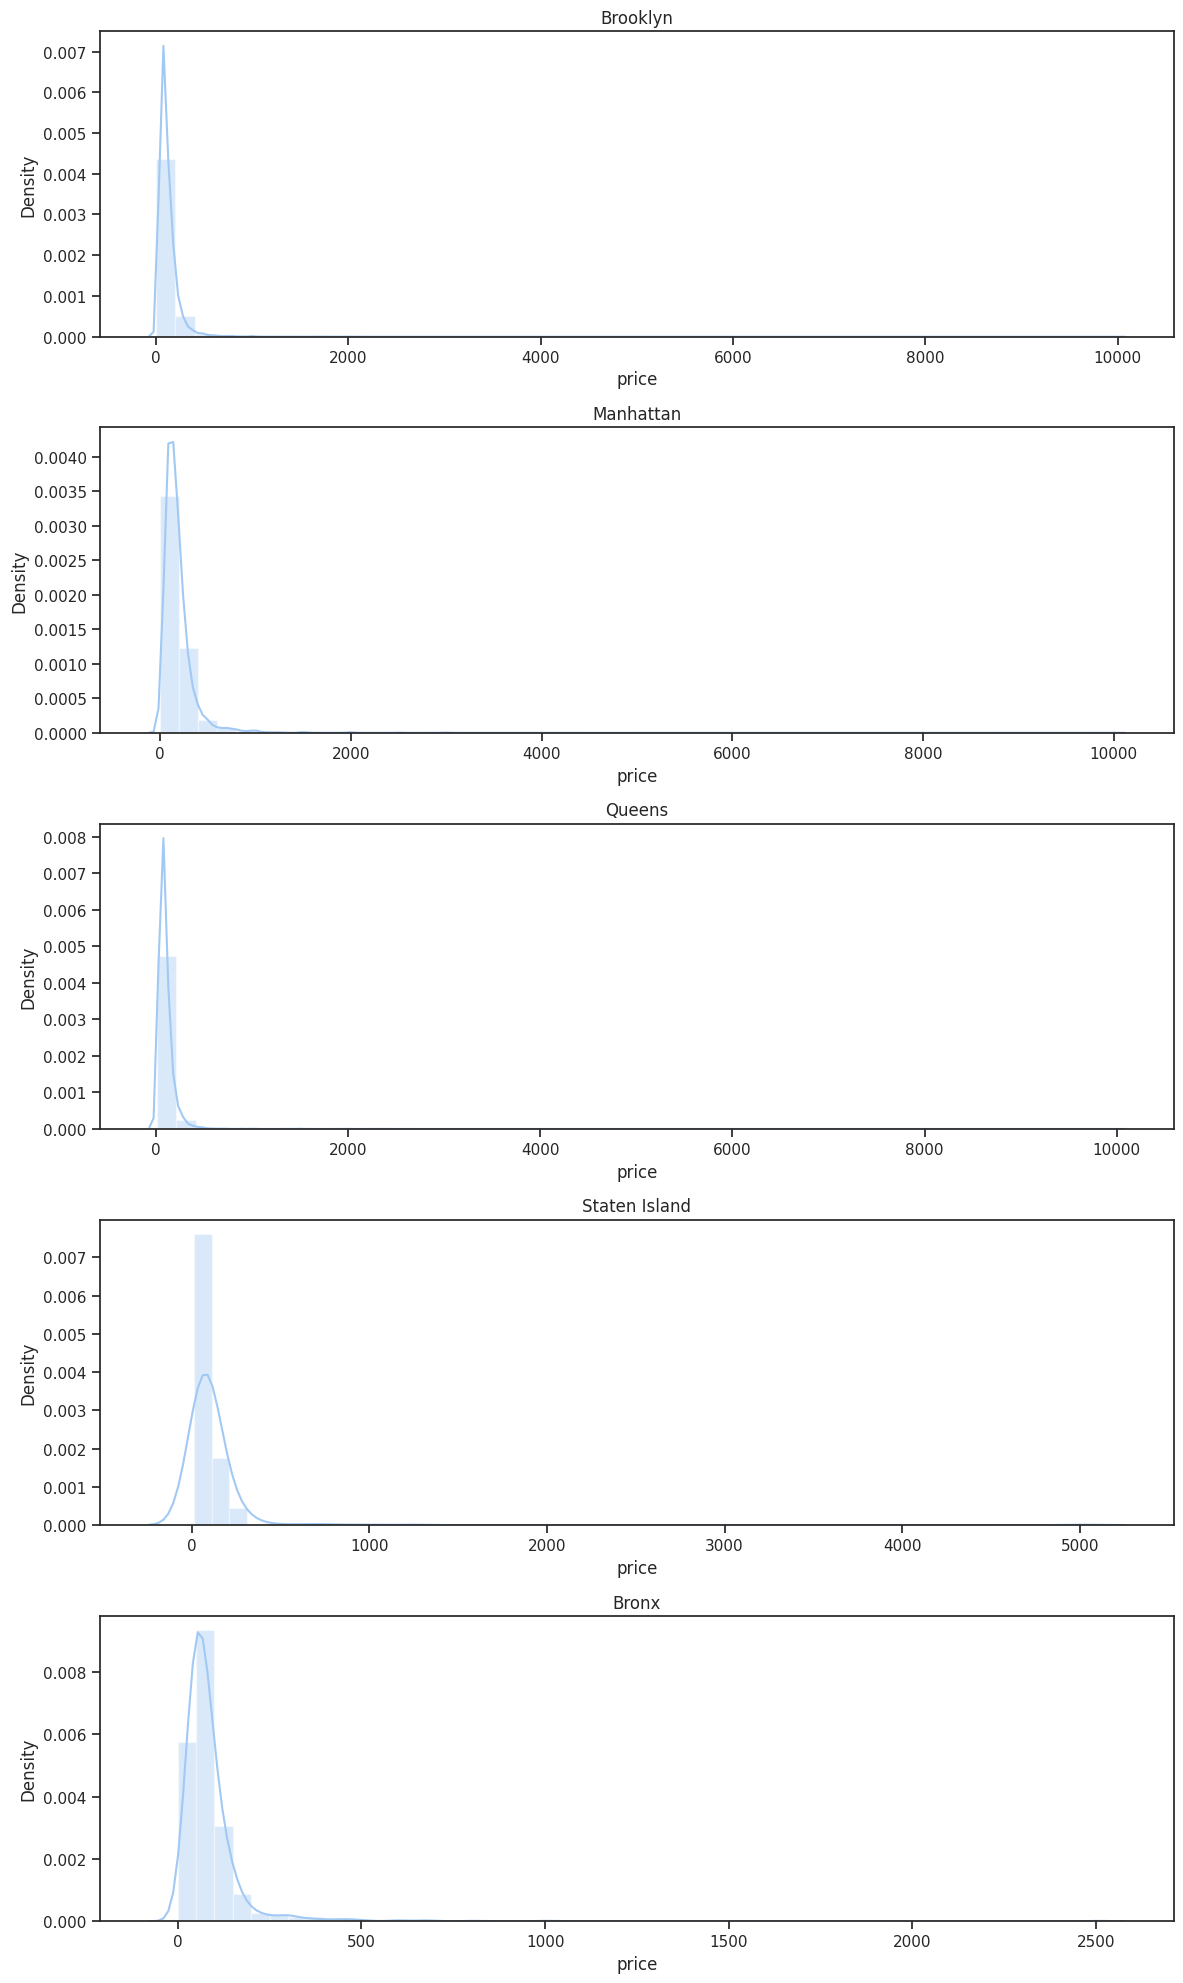

In [24]:
# Set up the matplotlib figure
f, subplots = plt.subplots(
                len(airbnb.neighbourhood_group.unique()),
                figsize=(12, 20)
            )

for i, neighbourhood_group in enumerate(airbnb.neighbourhood_group.unique()):
    neighbourhoods = airbnb[airbnb.neighbourhood_group == neighbourhood_group]['price']
    ax = subplots[i]
    dist_plot = sns.distplot(neighbourhoods, ax=ax)
    dist_plot.set_title(neighbourhood_group)

# Finalize the plot
plt.tight_layout(h_pad=1)
plt.show()

As we can see, in our grid of distribution plots we already have the data distributed by price and splitted by Neighbourhood group, so according to the plot above we finally can determinate that:


* Brooklyn averages around 70-500$ per night depending upon the neighbourhood.

* Manhattan averages around 80-490$.

*   Queens averages around 60-280$.

*  Staten Island averages around 50-800$.

*   Manhattan averages around 80-490$.

*   Bronx averages around 50-450$.




---



**Number of reviews grouped by Host Id**

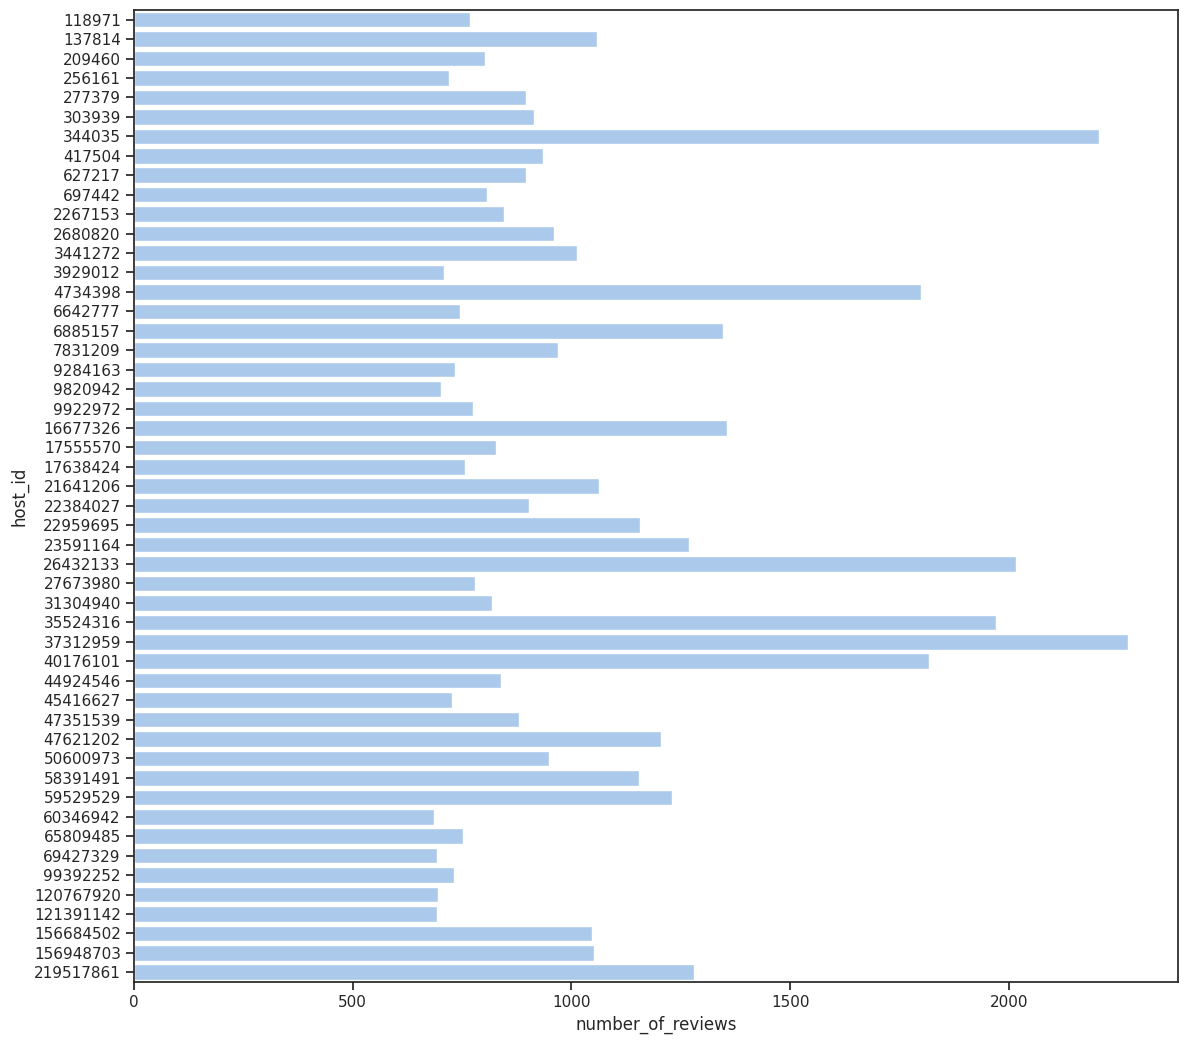

In [25]:
# Data Preparation
serie_airbnb = airbnb.groupby("host_id")["number_of_reviews"].agg("sum")
frame = { 'host_id': serie_airbnb.index, 'number_of_reviews': serie_airbnb.values }
df_airbnb = pd.DataFrame(frame).sort_values('number_of_reviews', ascending=False).head(50)

# BarPlot creation
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x="number_of_reviews", y="host_id",
            data=df_airbnb, color="b", ax=ax, orient="h")

# Add a legend and informative axis label
plt.show()

We already have the top host_id's with more number of reviews of the dataset, now we are going to print out the names that belongs to each host_id:

In [26]:
top_10_host_id = df_airbnb.host_id.unique()[:10]
names = airbnb.host_name[airbnb.host_id.isin(top_10_host_id)].unique()
names

array(['Jj', 'Randy', 'Alex And Zeena', 'Angela', 'Danielle',
       'Yasu & Akiko', 'Maya', 'Brooklyn&   Breakfast    -Len-', 'Brady',
       'Sonder (NYC)'], dtype=object)

Matrix Correlation (Table Visualization)

In [27]:
# Select only numerical columns before calculating correlation
numerical_airbnb = airbnb.select_dtypes(include=['number'])

# Calculate and visualize correlations
numerical_airbnb.corr().style.background_gradient(cmap='coolwarm')

HeatMap Correlation Visualization

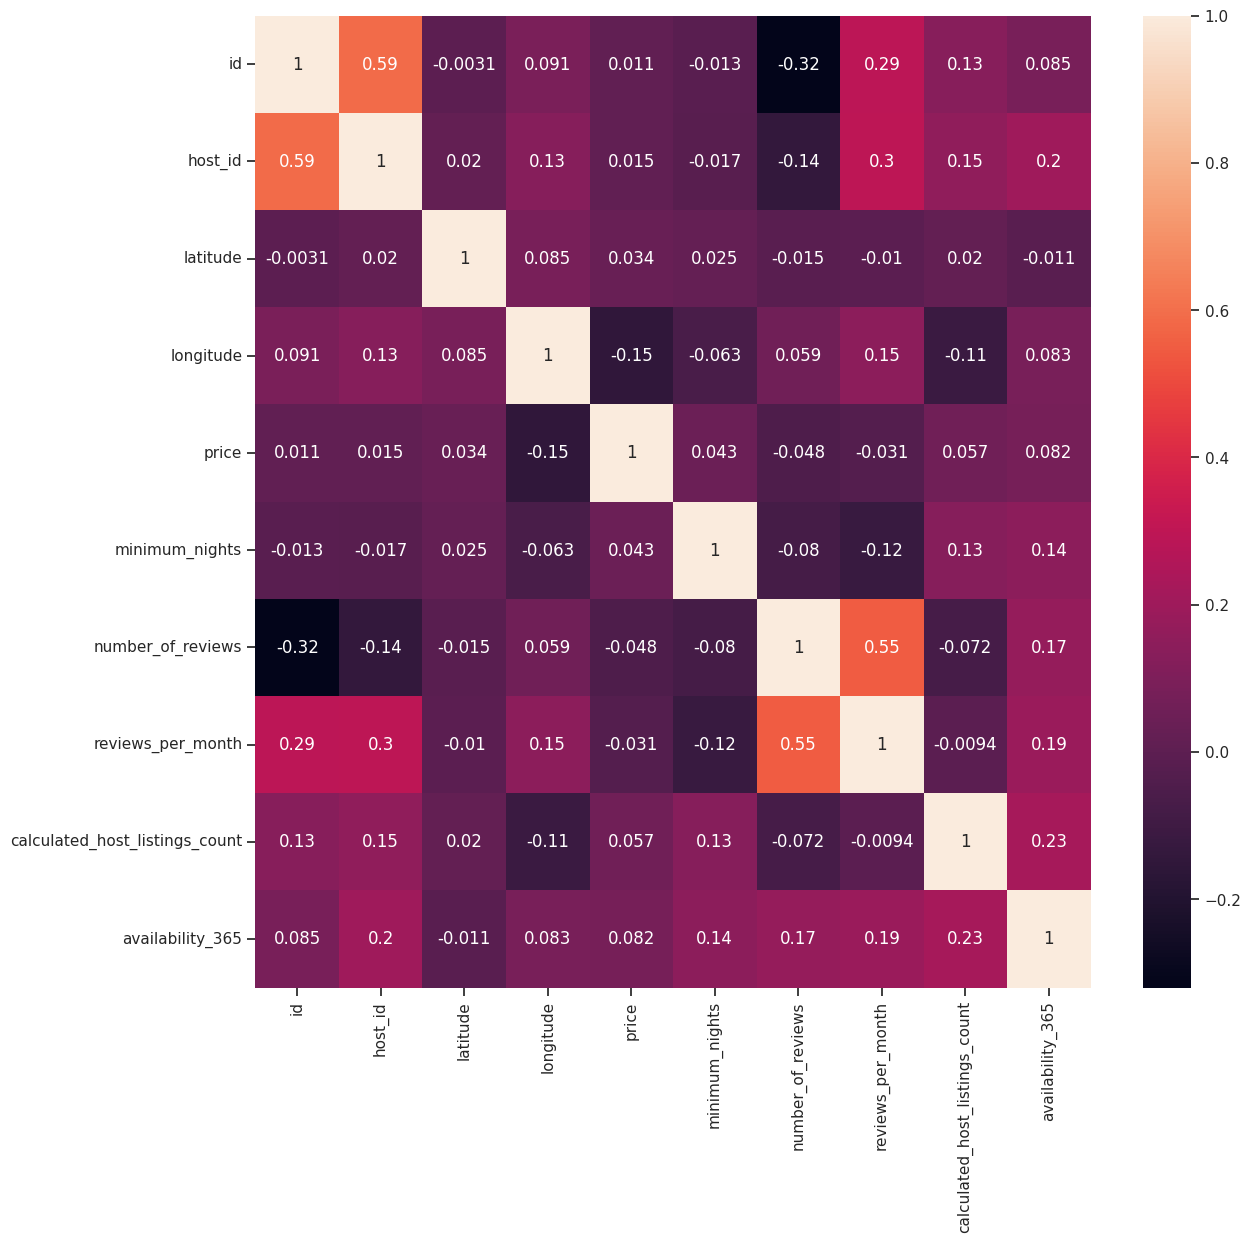

In [28]:
plt.figure(figsize=(12, 12))
sns.heatmap(numerical_airbnb.corr(), annot=True)
plt.show()

#Natural Language Processing


Word Cloud

A wordcloud or tag cloud is a visual representation of words that accomplished a text, where the size is bigger for those words that appear more often


In [29]:

from PIL import Image

def makeWordCloudImage(text, colormap="viridis", imageUrl=None):
    if imageUrl is not None:
        nyc_mask = np.array(Image.open(imageUrl))
        wc = WordCloud(background_color="white", colormap=colormap, mask=nyc_mask, contour_width=1.5, contour_color='steelblue')
    else:
        wc = WordCloud(background_color="white",width=1920, height=1080,max_font_size=200, max_words=200, colormap=colormap)
    wc.generate(text)

    # Show WordCloud
    f, ax = plt.subplots(figsize=(12, 12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Neighbourhoods WordCloud

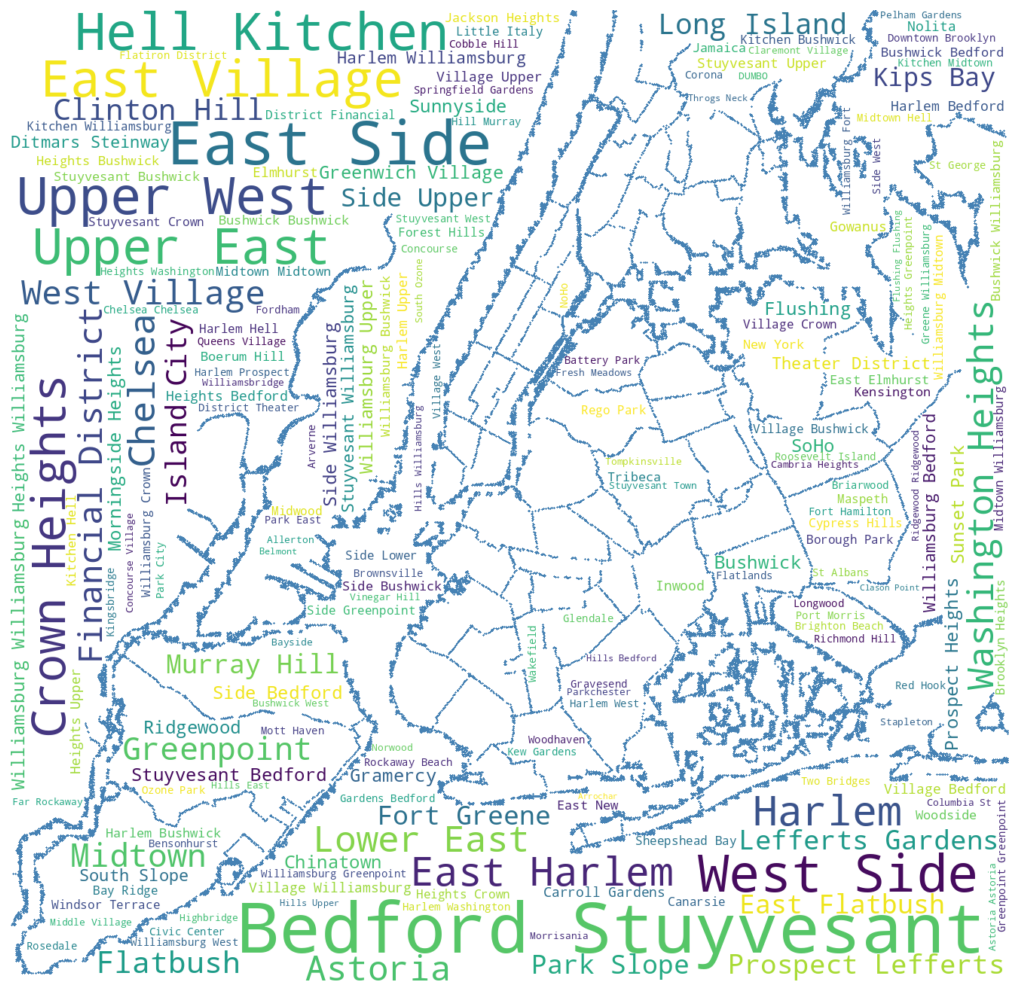

In [30]:
# Get list of neighbourhood Words
neighbourhood_text = " ".join([neighbourhood for neighbourhood in airbnb["neighbourhood"]])
makeWordCloudImage(neighbourhood_text, imageUrl="/content/New_York_City_.png")

Host Names WordCloud


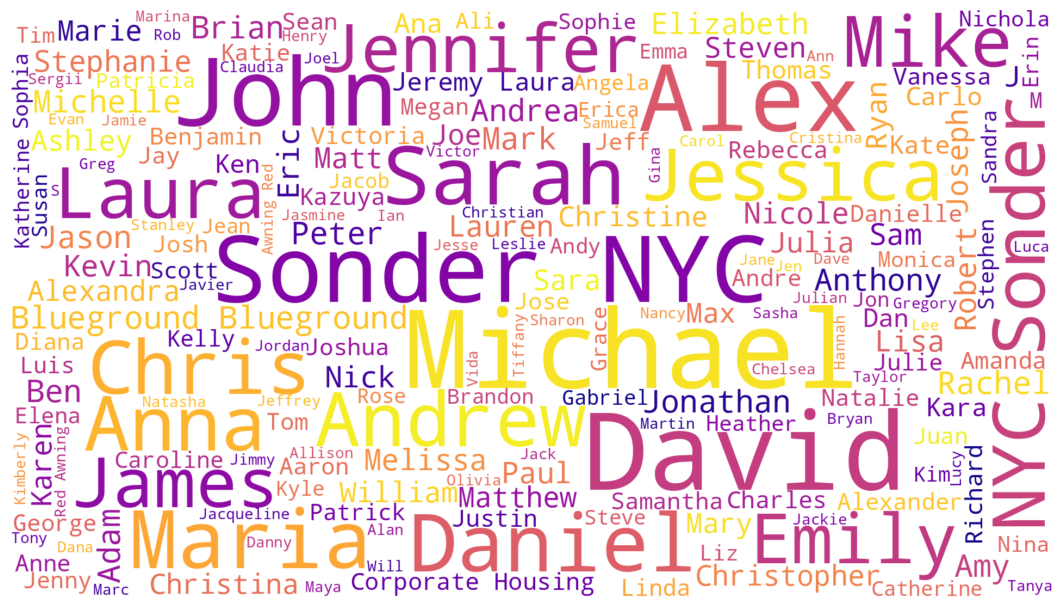

In [31]:
# Get list of neighbourhood Words
host_name_text = " ".join([host_name for host_name in airbnb["host_name"]])
makeWordCloudImage(host_name_text, colormap="plasma")

Names WordCloud

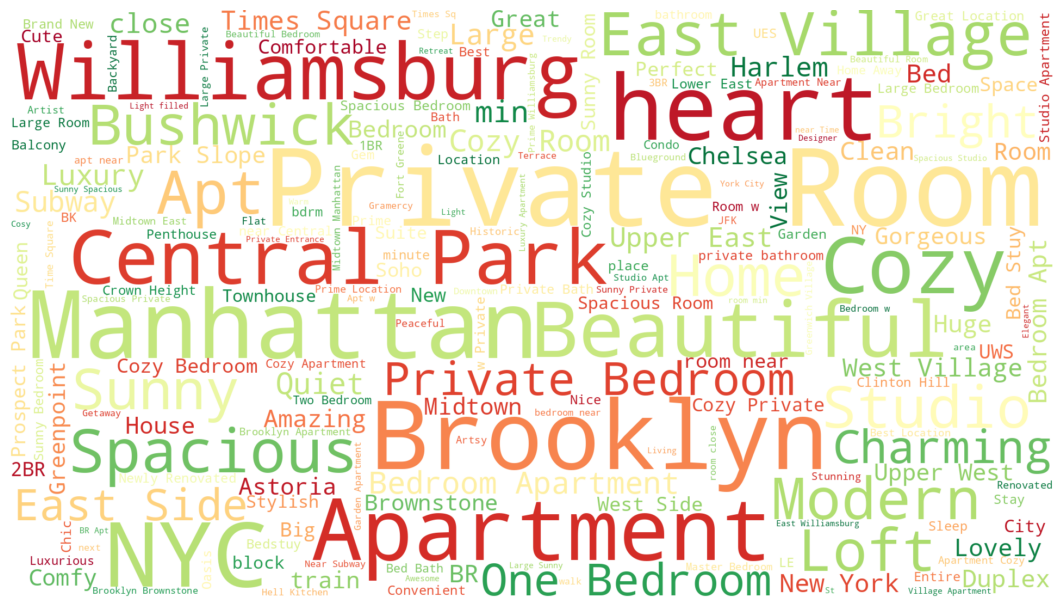

In [32]:
# Get list of names Words
names_text = " ".join([name for name in airbnb["name"]])
makeWordCloudImage(names_text, colormap="RdYlGn")

#**Data Visualizations**

#HeatMaps & Spatial Analysis

Spatial Analysis by Neighbourhood Groups


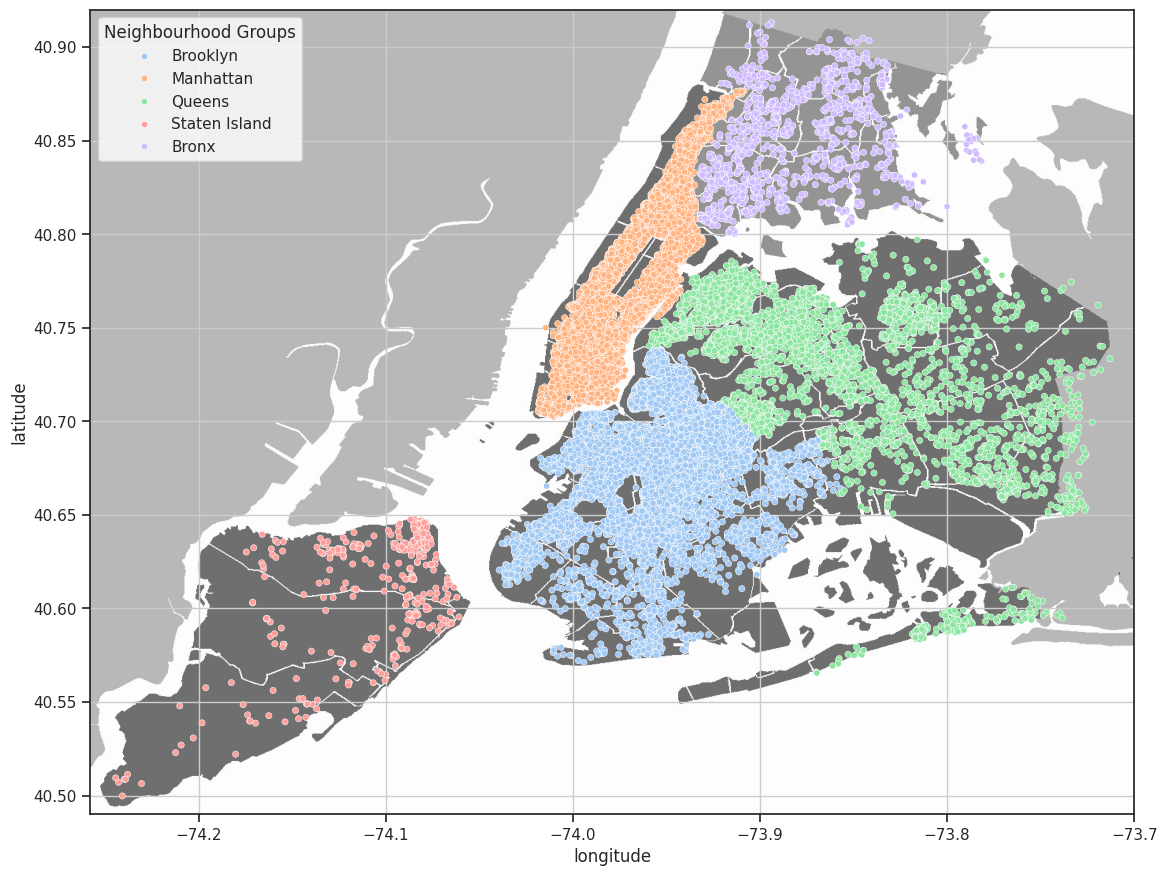

In [33]:
fig, ax = plt.subplots(figsize=(12,12))

# Show Background image
img=plt.imread('/content/New_York_City_.png', 0)
coordenates_to_extent = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coordenates_to_extent)

# Plotting
scatter_map = sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, ax=ax, data=airbnb)
ax.grid(True)
plt.legend(title='Neighbourhood Groups')
plt.show()

#Price Overview in a HeatMap Normalization

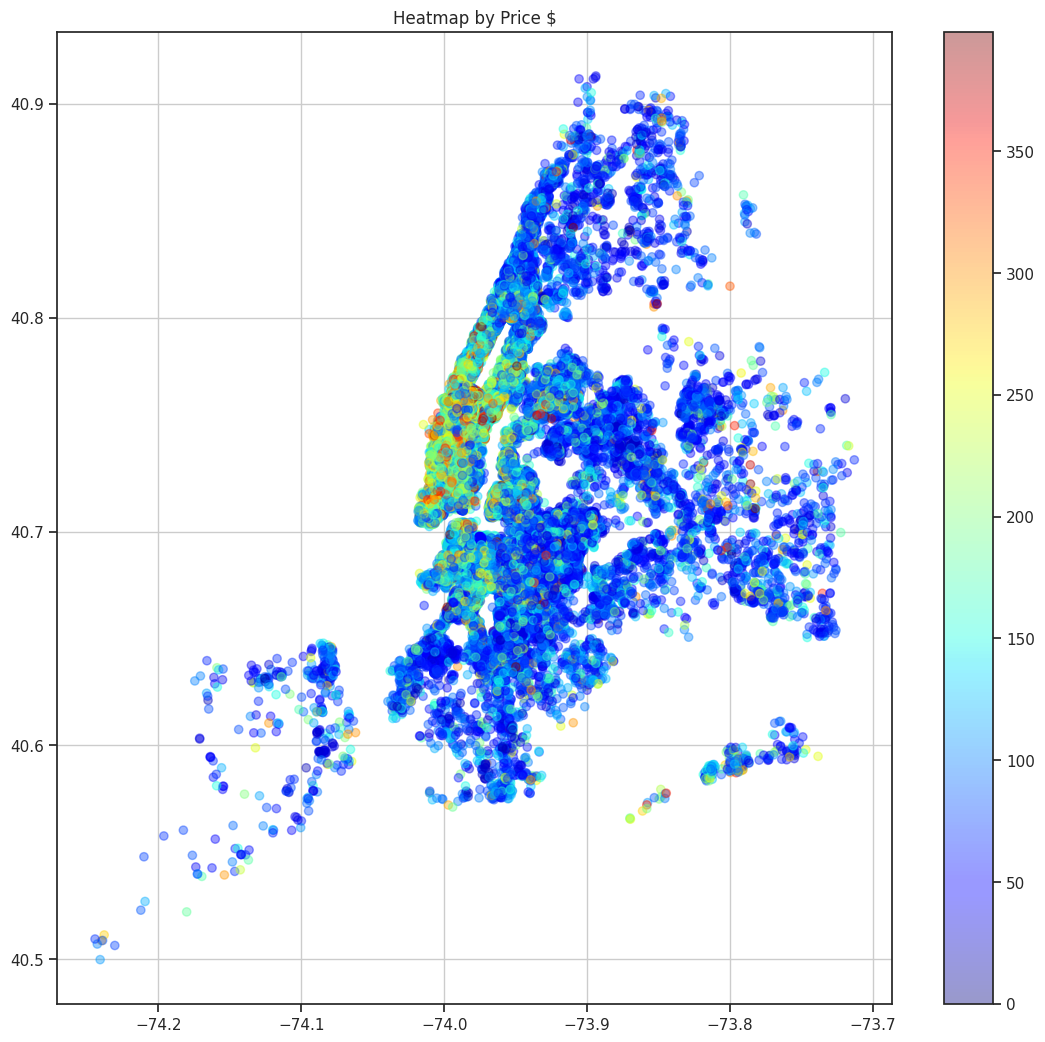

In [34]:
# Filter values
FILTER_PRICE_VALUE = 400
sub_airbnb = airbnb[airbnb.price < FILTER_PRICE_VALUE]

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 12))

cmap = plt.get_cmap('jet') # ColorMaps
c = sub_airbnb.price           # color, sequence, or sequence of color, optional
alpha = 0.5                # The alpha blending value, between 0 (transparent) and 1 (opaque).
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c,
                            cmap=cmap, alpha=0.4)

plt.title("Heatmap by Price $")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

Following the above Heatmap sequenced by price, we can confirm that the most expensive airbnbs are in Manhattan neighbourhood zone which is also the more rented as we could confirm in the first plot ! The rest of zones are regularly proportionate and all of them have the about same price

#Distribution of Airbnb's in New York City (HeatMap)

In [35]:
# Cretion of Leaflet map
map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(airbnb[['latitude','longitude']].dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

#**Predictions**

#Preprocessing and preparing Data for *Prediction*

Load again the dataset from CSV file to avoid missing data

In [37]:
'''Read in airbnb from csv file & Preparing Data'''
airbnb=pd.read_csv('/content/AB_NYC_2019.csv')

In [38]:
airbnb.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
airbnb['reviews_per_month']=airbnb['reviews_per_month'].replace(np.nan, 0)

In [39]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group']=le.transform(airbnb['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(airbnb['neighbourhood'])
airbnb['neighbourhood']=le.transform(airbnb['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(airbnb['room_type'])
airbnb['room_type']=le.transform(airbnb['room_type'])

airbnb.sort_values(by='price',ascending=True,inplace=True)

airbnb.head()

host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
25796   86327101                    1             13  40.68258  -73.91284   
25634   15787004                    1             28  40.69467  -73.92433   
25433  131697576                    0             62  40.83296  -73.88668   
25753    1641537                    1             91  40.72462  -73.94072   
23161    8993084                    1             13  40.69023  -73.95428   

       room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
25796          1      0               1                 95               4.35   
25634          1      0               2                 16               0.71   
25433          1      0               2                 55               2.56   
25753          1      0               2                 12               0.53   
23161          1      0               4                  1               0.05   

       calculated_host_listings_count  availability_365  
25796                               6               222  
25634                               5                 0  
25433                               4               127  
25753                               2                 0  
23161                               4                28

In [40]:
'''Reversing Labeling Transform'''
list(le.inverse_transform(airbnb['room_type']))[:10]

['Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Shared room',
 'Entire home/apt',
 'Private room',
 'Shared room']

#**Modeling**

#Linear Regression Model

In [41]:
'''Train LRM'''
lm = LinearRegression()

X = airbnb[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression()

In [42]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 180.73409656936235
        R2 Score: 11.639576782323813
        Mean Absolute Error: 72.86091366825372
     


#**Gradient Boosted Regressor Model**

In [43]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

In [45]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 175.5769507913822
        R2 Score: 16.610262420881494
        Mean Absolute Error: 63.95920183449435
     


#**Results**

Predictions (Linear Regression Model)

**Actual Values** VS **Predicted Values**

In [46]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0            400        135.112125
1            140        210.599057
2            195        176.222978
3            120        100.439183
4             88         88.545753

**Gradient Boosted Regressor model Predictions**